In [4]:
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd

In [5]:
# Create an engine for the `hawaii.sqlite` database
### BEGIN SOLUTION
engine = create_engine('sqlite:///hawaii.sqlite', echo=False)

# Declare a Base using `automap_base()`
Base = automap_base()

# Reflect Database into ORM classes
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [6]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)


from sqlalchemy import Column, Text
class Measurement(Base):
    __tablename__ = "measurements"
    __table_args__ = {"extend_existing": True}
    date = Column(Text)
Base.prepare()

# Save a reference to the measurenment table as 'Measurement'
Measurements = Base.classes.measurements
# Save a reference to the station table as 'Station'
Station = Base.classes.stations

/Users/Ben/anaconda3/envs/PythonData/lib/python3.6/site-packages/sqlalchemy/ext/declarative/clsregistry.py:120: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.stations, and will be replaced in the string-lookup table.
  item.__name__


## Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Plot the results using the DataFrame plot method.

Use Pandas to print the summary statistics for the precipitation data.

In [7]:

# Create query session# Create 
import datetime as dt
session = Session(bind=engine)

In [8]:
import re
from sqlalchemy.dialects.sqlite import DATE

d = DATE(
        storage_format="%(month)02d/%(day)02d/%(year)04d",
        regexp=re.compile("(?P<month>\d+)/(?P<day>\d+)/(?P<year>\d+)")
    )

In [9]:
# Grabs the last date entry in the data table# Grabs  
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(last_date)

(datetime.date(2017, 8, 23),)


In [10]:
# to get the last 12 months of data, last date - 365# to get 
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [11]:
# query to pull the last year of precipitation data
rain = session.query(Measurements.date, Measurements.precipitation).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()

In [12]:
# Load the data from the query into a dataframe

rain_df = pd.DataFrame(rain)
rain_df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


In [13]:
# reset the index to the date# reset  # reset  

rain_df.set_index('date').head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


## Plot the results using the DataFrame plot method.

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np

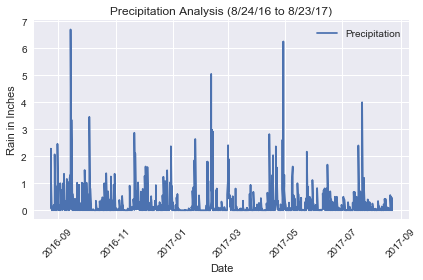

In [15]:
# plot the dataframe# plot t 
rain_df.plot('date', 'precipitation')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to print the summary statistics for the precipitation data.
rain_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order

Which station has the highest number of observations?

Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.

Plot the results as a histogram with bins=12

In [18]:
# Design a query to calculate the total number of stations.

total_stations = session.query(Station).count()
print("There are {} stations.".format(total_stations))

There are 9 stations.


In [19]:

# find the station with the most temperature observations, then list them all in descending order# find t # find t 
busy_station = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).\
               order_by(func.count(Measurements.tobs).desc()).all()

busiest = busy_station[0][0]    
print("The busiest Station was",busiest,"with",busy_station[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in busy_station:
    print("Station",station,"had",count, "weather observations.")

The busiest Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00513117 had 2696 weather observations.
Station USC00519397 had 2685 weather observations.
Station USC00519523 had 2572 weather observations.
Station USC00516128 had 2484 weather observations.
Station USC00514830 had 1937 weather observations.
Station USC00511918 had 1932 weather observations.
Station USC00517948 had 683 weather observations.
Station USC00518838 had 342 weather observations.


In [20]:

# query to pull the last year of precipitation data for the busiest station# query  
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station == busiest).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()

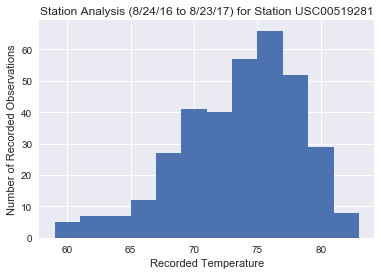

In [21]:
# plot the temperature data in a histogram with 12 bins# plot t 
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busiest)
plt.show()

## Temperature Analysis (optional)

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2016, 8, 23', '2017, 8, 23'))

[(56, 74.08554857419043, 84)]


In [23]:

# calculate the min/max/avg from last year that matches my trip date# calcul 
trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(67, 74.39080459770115, 82)]


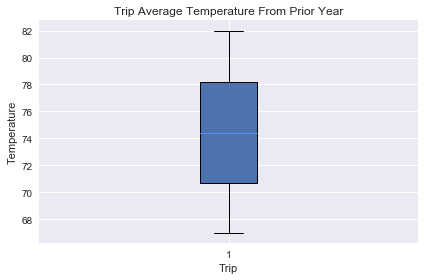

In [24]:
# plotting the data as a boxplot# plotti 

fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

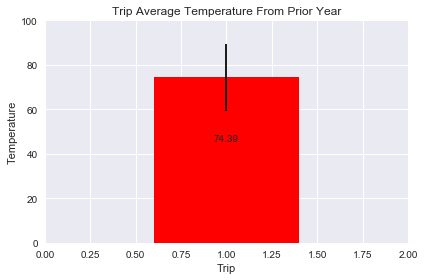

In [25]:

# plot the calculated min/max/avg from last year for the trip dates as a bar chart# plot t 

p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'red', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()